In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.columns=data.columns.astype("str")

In [4]:
data.columns=data.columns.map(str.upper)

In [5]:
data.columns

Index(['CUSTOMER', 'STATE', 'CUSTOMER LIFETIME VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE TO DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION CODE', 'MARITAL STATUS', 'MONTHLY PREMIUM AUTO',
       'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION',
       'NUMBER OF OPEN COMPLAINTS', 'NUMBER OF POLICIES', 'POLICY TYPE',
       'POLICY', 'RENEW OFFER TYPE', 'SALES CHANNEL', 'TOTAL CLAIM AMOUNT',
       'VEHICLE CLASS', 'VEHICLE SIZE'],
      dtype='object')

In [6]:
num_col = data.select_dtypes(include=['float64']).columns
display(num_col)
cat_col = data.select_dtypes(include=['object']).columns
display(cat_col)

Index(['CUSTOMER LIFETIME VALUE', 'TOTAL CLAIM AMOUNT'], dtype='object')

Index(['CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EFFECTIVE TO DATE', 'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION CODE',
       'MARITAL STATUS', 'POLICY TYPE', 'POLICY', 'RENEW OFFER TYPE',
       'SALES CHANNEL', 'VEHICLE CLASS', 'VEHICLE SIZE'],
      dtype='object')

In [7]:
data.columns[data.isna().any()].tolist()

[]

In [8]:
data['month'] = pd.DatetimeIndex(data['EFFECTIVE TO DATE']).month
data.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [9]:
data.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER LIFETIME VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE TO DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION CODE                     object
MARITAL STATUS                    object
MONTHLY PREMIUM AUTO               int64
MONTHS SINCE LAST CLAIM            int64
MONTHS SINCE POLICY INCEPTION      int64
NUMBER OF OPEN COMPLAINTS          int64
NUMBER OF POLICIES                 int64
POLICY TYPE                       object
POLICY                            object
RENEW OFFER TYPE                  object
SALES CHANNEL                     object
TOTAL CLAIM AMOUNT               float64
VEHICLE CLASS                     object
VEHICLE SIZE                      object
month           

In [10]:
print (data.isnull().sum())

CUSTOMER                         0
STATE                            0
CUSTOMER LIFETIME VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE TO DATE                0
EMPLOYMENTSTATUS                 0
GENDER                           0
INCOME                           0
LOCATION CODE                    0
MARITAL STATUS                   0
MONTHLY PREMIUM AUTO             0
MONTHS SINCE LAST CLAIM          0
MONTHS SINCE POLICY INCEPTION    0
NUMBER OF OPEN COMPLAINTS        0
NUMBER OF POLICIES               0
POLICY TYPE                      0
POLICY                           0
RENEW OFFER TYPE                 0
SALES CHANNEL                    0
TOTAL CLAIM AMOUNT               0
VEHICLE CLASS                    0
VEHICLE SIZE                     0
month                            0
dtype: int64


In [11]:
#########################################################################

In [12]:
data.describe() 

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [14]:
data.head(40)

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize,1
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,2


In [15]:
data['RESPONSE'].value_counts()

No     7826
Yes    1308
Name: RESPONSE, dtype: int64

<AxesSubplot:>

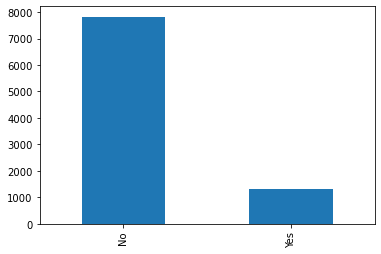

In [16]:
data['RESPONSE'].value_counts().plot (kind='bar')

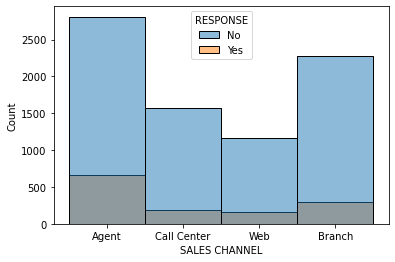

In [17]:
sns.histplot(x='SALES CHANNEL', hue='RESPONSE', data=data)
plt.show()

In [18]:
print(data['SALES CHANNEL'].value_counts())

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: SALES CHANNEL, dtype: int64


In [19]:
df2=data['RESPONSE'].value_counts()/len(data) *100
print(round(df2,1))

No     85.7
Yes    14.3
Name: RESPONSE, dtype: float64


In [20]:
data2= data[['RESPONSE','TOTAL CLAIM AMOUNT']]
print (data2)

     RESPONSE  TOTAL CLAIM AMOUNT
0          No          384.811147
1          No         1131.464935
2          No          566.472247
3          No          529.881344
4          No          138.130879
...       ...                 ...
9129       No          198.234764
9130      Yes          379.200000
9131       No          790.784983
9132       No          691.200000
9133       No          369.600000

[9134 rows x 2 columns]


<AxesSubplot:xlabel='TOTAL CLAIM AMOUNT'>

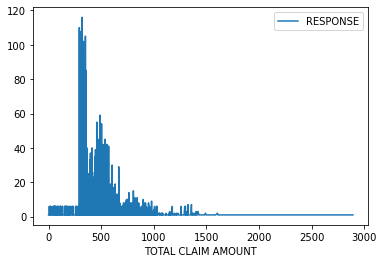

In [21]:
data2.groupby('TOTAL CLAIM AMOUNT').count().plot()

In [22]:
data3=data[['RESPONSE','INCOME']]
print(data3)

     RESPONSE  INCOME
0          No   56274
1          No       0
2          No   48767
3          No       0
4          No   43836
...       ...     ...
9129       No   71941
9130      Yes   21604
9131       No       0
9132       No   21941
9133       No       0

[9134 rows x 2 columns]


<AxesSubplot:xlabel='INCOME'>

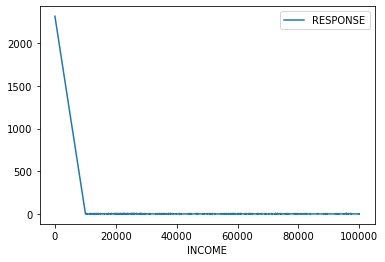

In [23]:
data3.groupby('INCOME').count().plot()

In [24]:
###############################################################################################################################

In [25]:
data.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER LIFETIME VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE TO DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION CODE                     object
MARITAL STATUS                    object
MONTHLY PREMIUM AUTO               int64
MONTHS SINCE LAST CLAIM            int64
MONTHS SINCE POLICY INCEPTION      int64
NUMBER OF OPEN COMPLAINTS          int64
NUMBER OF POLICIES                 int64
POLICY TYPE                       object
POLICY                            object
RENEW OFFER TYPE                  object
SALES CHANNEL                     object
TOTAL CLAIM AMOUNT               float64
VEHICLE CLASS                     object
VEHICLE SIZE                      object
month           

In [26]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(object)

display (numerical.head())
display (categorical.head())

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2


,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,LOCATION CODE,MARITAL STATUS,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [27]:
import matplotlib.pyplot as plt 

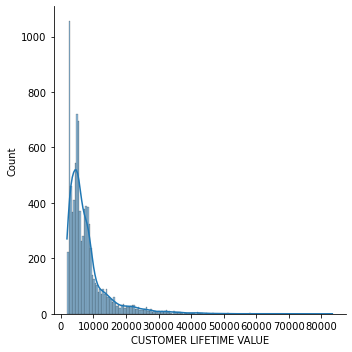

In [28]:
sns.displot(numerical['CUSTOMER LIFETIME VALUE'], kde=True)

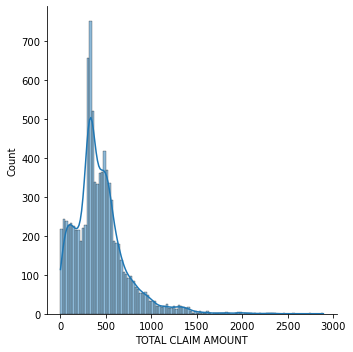

In [29]:
sns.displot(numerical['TOTAL CLAIM AMOUNT'], kde=True)

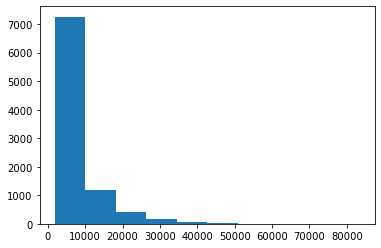

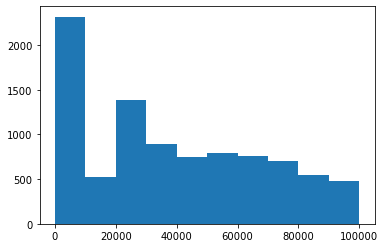

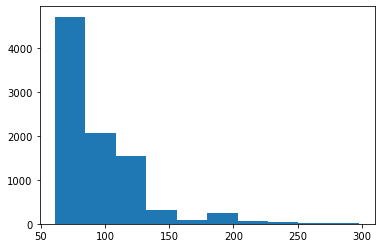

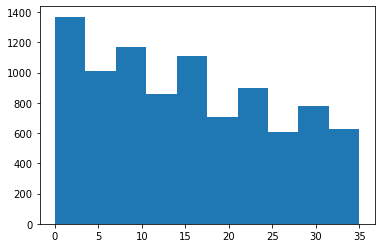

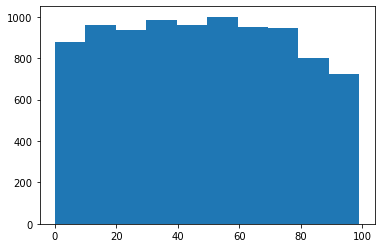

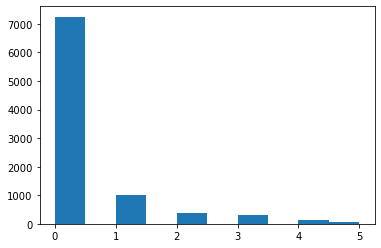

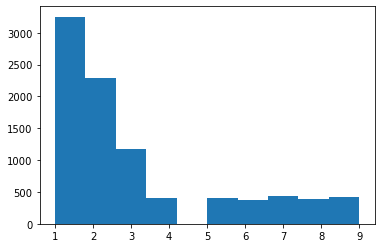

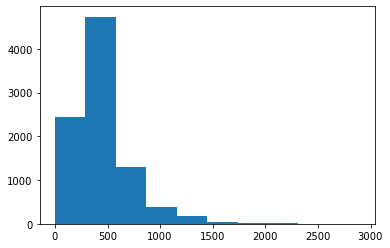

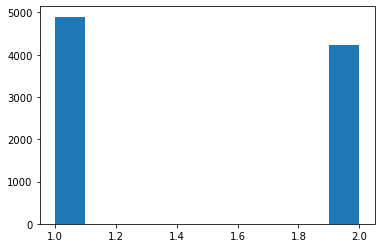

In [30]:
for column_name in numerical.columns:
    plt.hist(numerical[column_name])
    plt.show()

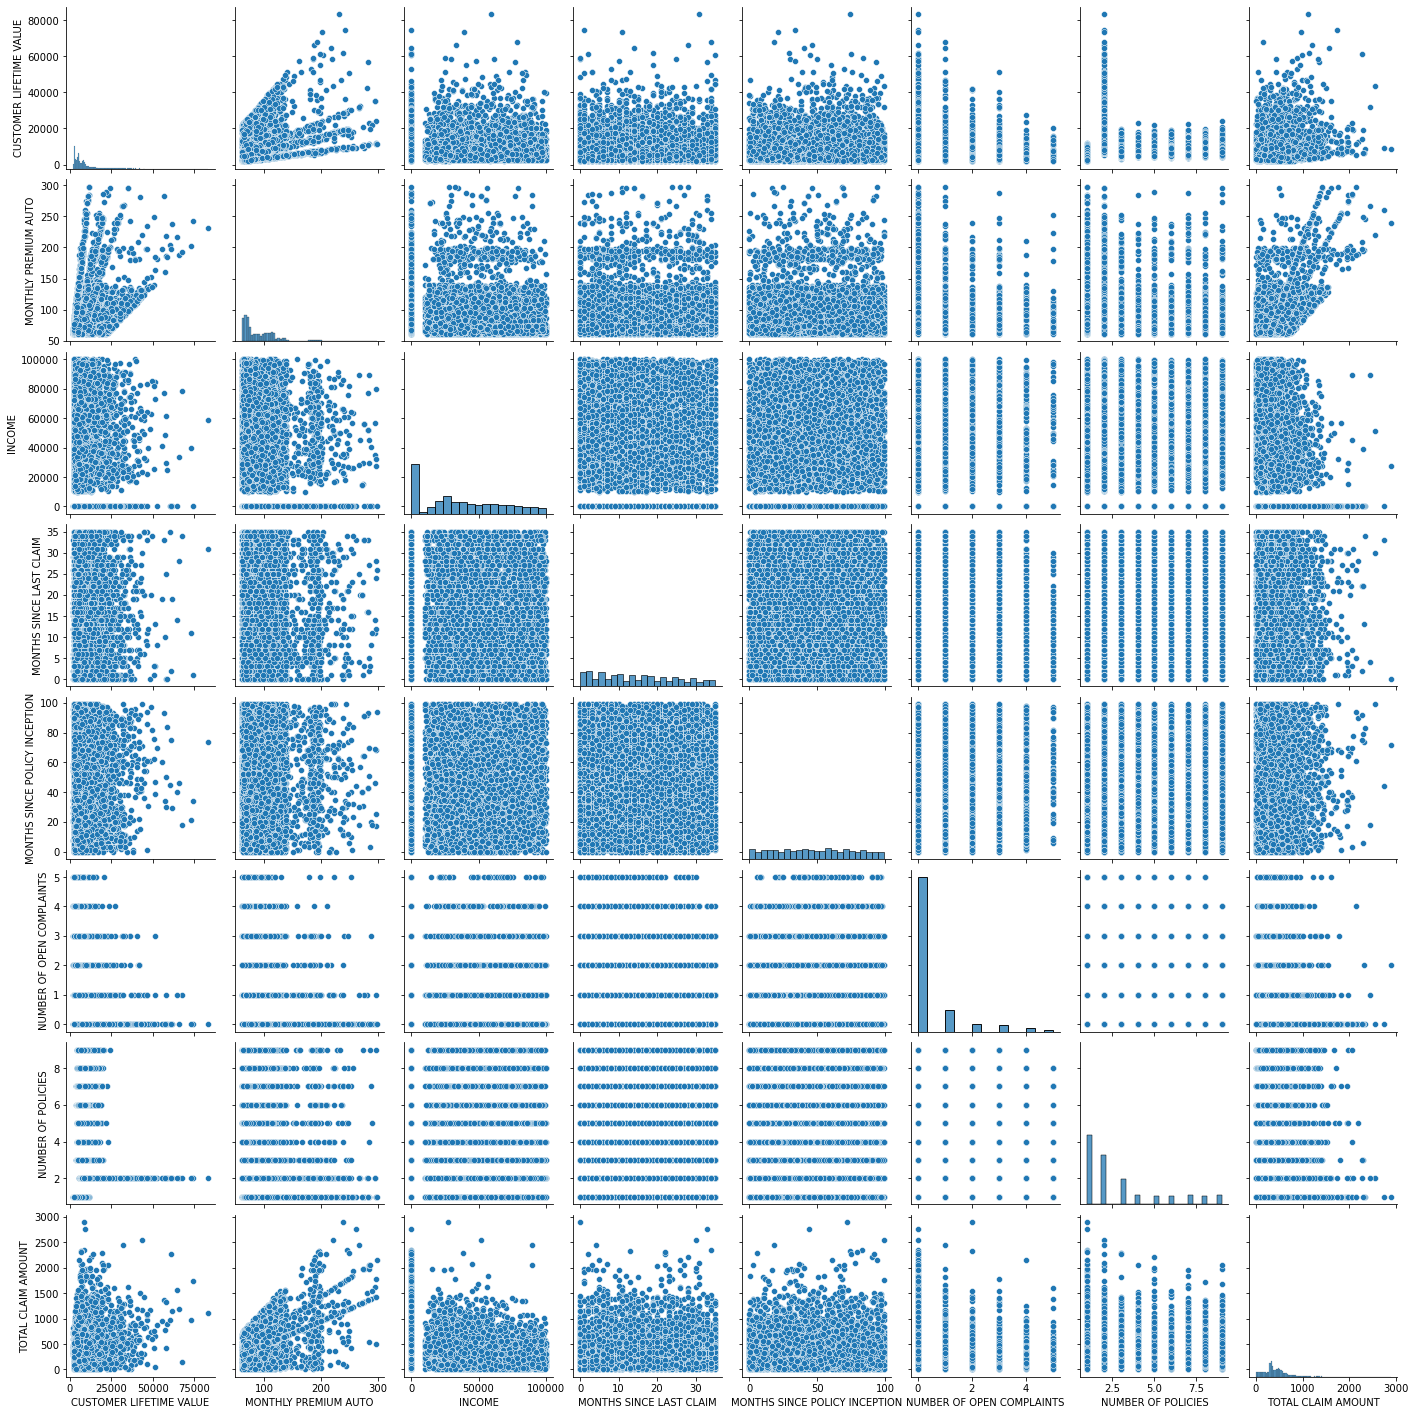

In [31]:
sns.pairplot(data[['CUSTOMER LIFETIME VALUE', 'MONTHLY PREMIUM AUTO', 'INCOME', 'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION', 'NUMBER OF OPEN COMPLAINTS','NUMBER OF POLICIES','TOTAL CLAIM AMOUNT']])
plt.show()

In [32]:
numerical.corr()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month
CUSTOMER LIFETIME VALUE,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
INCOME,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
MONTHLY PREMIUM AUTO,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
MONTHS SINCE LAST CLAIM,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
MONTHS SINCE POLICY INCEPTION,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
NUMBER OF OPEN COMPLAINTS,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
NUMBER OF POLICIES,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
TOTAL CLAIM AMOUNT,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


In [33]:
correlations_matrix=numerical.corr()

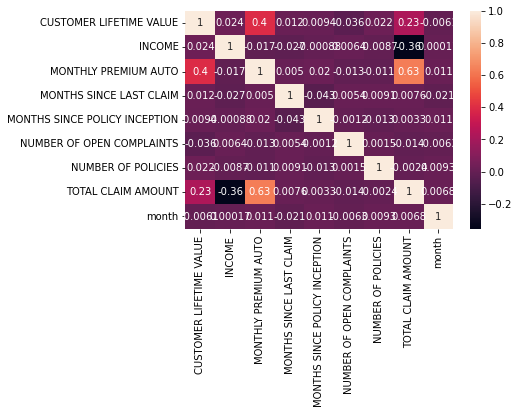

In [34]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [35]:
###############################################################################################################################

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = numerical[['CUSTOMER LIFETIME VALUE','INCOME', 'MONTHLY PREMIUM AUTO', 'NUMBER OF POLICIES']]
y = numerical['TOTAL CLAIM AMOUNT']

In [38]:
X.describe()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF POLICIES
count,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,2.966170
std,6870.967608,30379.904734,34.407967,2.390182
min,1898.007675,0.000000,61.000000,1.000000
25%,3994.251794,0.000000,68.000000,1.000000
50%,5780.182197,33889.500000,83.000000,2.000000
75%,8962.167041,62320.000000,109.000000,4.000000
max,83325.381190,99981.000000,298.000000,9.000000


In [39]:
data2=data._get_numeric_data().iloc[:, 0:3].dropna()
data2.head()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO
0,2763.519279,56274,69
1,6979.535903,0,94
2,12887.431650,48767,108
3,7645.861827,0,106
4,2813.692575,43836,73


In [40]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(data2)
x_standardized = transformer.transform(data2)

data2=pd.DataFrame(x_standardized)
data2.head()

,0,1,2
0,0.010629,0.562847,0.033755
1,0.062406,0.000000,0.139241
2,0.134960,0.487763,0.198312
3,0.070589,0.000000,0.189873
4,0.011245,0.438443,0.050633


In [41]:
X.describe()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF POLICIES
count,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,2.966170
std,6870.967608,30379.904734,34.407967,2.390182
min,1898.007675,0.000000,61.000000,1.000000
25%,3994.251794,0.000000,68.000000,1.000000
50%,5780.182197,33889.500000,83.000000,2.000000
75%,8962.167041,62320.000000,109.000000,4.000000
max,83325.381190,99981.000000,298.000000,9.000000


In [42]:
###############################################################################

In [43]:
#categorical features and numerical ones are going to be treated differently
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

In [44]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER LIFETIME VALUE,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
INCOME,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
MONTHLY PREMIUM AUTO,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
MONTHS SINCE LAST CLAIM,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
MONTHS SINCE POLICY INCEPTION,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
NUMBER OF OPEN COMPLAINTS,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
NUMBER OF POLICIES,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
TOTAL CLAIM AMOUNT,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [45]:
X_num.shape

(9134, 9)

In [46]:
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_num) # fit() Determine the min and the max of each column
x_normalized = MinMaxtransformer.transform(X_num) # .transform() applies the transformation x_normalized will be np.array
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_normalized),x_normalized.shape))
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns) # Take the column's names from X_num
x_normalized.head()

The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (9134, 9)


,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,1.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,1.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,1.0


In [47]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER LIFETIME VALUE,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
INCOME,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
MONTHLY PREMIUM AUTO,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
MONTHS SINCE LAST CLAIM,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
MONTHS SINCE POLICY INCEPTION,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
NUMBER OF OPEN COMPLAINTS,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
NUMBER OF POLICIES,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
TOTAL CLAIM AMOUNT,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [48]:
x_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER LIFETIME VALUE,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
INCOME,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
MONTHLY PREMIUM AUTO,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
MONTHS SINCE LAST CLAIM,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
MONTHS SINCE POLICY INCEPTION,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
NUMBER OF OPEN COMPLAINTS,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
NUMBER OF POLICIES,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0
TOTAL CLAIM AMOUNT,9134.0,0.150006,0.100410,0.0,0.094071,0.132675,0.189212,1.0
month,9134.0,0.463762,0.498712,0.0,0.000000,0.000000,1.000000,1.0


In [49]:
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler()
Standardtransformer.fit(X_num) # This will obtain the mean and the sd of each column
x_standardized = Standardtransformer.transform(X_num) # Applies the transformation
print("The numpy array looks like this: ",x_standardized)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_standardized),x_standardized.shape))
x_standardized = pd.DataFrame(x_standardized,columns=X_num.columns)
x_standardized.head()

The numpy array looks like this:  [[-0.76287773  0.61282744 -0.70392465 ... -0.82264788 -0.16963969
   1.07530438]
 [-0.14924546 -1.23961684  0.02269103 ...  2.10615996  2.400737
  -0.92996924]
 [ 0.71063622  0.36570978  0.42959581 ... -0.40424676  0.45573376
   1.07530438]
 ...
 [ 0.02313483 -1.23961684 -0.23889062 ... -0.40424676  1.22793667
   1.07530438]
 [-0.06993547 -0.51735647  0.08082028 ...  0.01415436  0.88511256
   1.07530438]
 [-0.78495478 -1.23961684 -0.47140763 ... -0.82264788 -0.22200449
   1.07530438]]
The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (9134, 9)


,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,1.075304
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,-0.929969
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,1.075304
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,-0.929969
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,1.075304


In [50]:
x_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER LIFETIME VALUE,9134.0,1.168080e-17,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
INCOME,9134.0,5.160945e-16,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
MONTHLY PREMIUM AUTO,9134.0,-1.480399e-16,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
MONTHS SINCE LAST CLAIM,9134.0,4.976191e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
MONTHS SINCE POLICY INCEPTION,9134.0,1.003260e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
NUMBER OF OPEN COMPLAINTS,9134.0,-1.232865e-16,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
NUMBER OF POLICIES,9134.0,3.747702e-16,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
TOTAL CLAIM AMOUNT,9134.0,7.961420e-19,1.000055,-1.494022,-0.557106,-0.172620,0.390472,8.465696
month,9134.0,3.045517e-16,1.000055,-0.929969,-0.929969,-0.929969,1.075304,1.075304


In [51]:
pd.concat([X_num,x_normalized,x_standardized],axis=1)

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month,CUSTOMER LIFETIME VALUE,...,month,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month
0,2763.519279,56274,69,32,5,0,1,384.811147,2,0.010629,...,1.0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640,1.075304
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0.062406,...,0.0,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737,-0.929969
2,12887.431650,48767,108,18,38,0,2,566.472247,2,0.134960,...,1.0,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734,1.075304
3,7645.861827,0,106,18,65,0,7,529.881344,1,0.070589,...,0.0,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769,-0.929969
4,2813.692575,43836,73,12,44,0,1,138.130879,2,0.011245,...,1.0,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843,1.075304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,2,0.264137,...,1.0,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934,1.075304
9130,3096.511217,21604,79,14,28,0,1,379.200000,2,0.014719,...,1.0,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956,1.075304
9131,8163.890428,0,85,9,37,3,2,790.784983,2,0.076951,...,1.0,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937,1.075304
9132,7524.442436,21941,96,34,3,0,3,691.200000,2,0.069098,...,1.0,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113,1.075304


In [52]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(X_cat)  
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
onehot_encoded.head(20)

[array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
       'ZZ97035'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
       '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
       '1/20/11', '1/21/11', '1/22/11', '1/23/11', '1/24/11', '1/25/11',
       '1/26/11', '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11',
       '1/31/11', '1/4/11', '1/5/11', '1/6/11', '1/7/11', '1/8/11',
       '1/9/11', '2/1/11', '2/10/11', '2/11/11', '2/12/11', '2/13/11',
       '2/14/11', '2/15/11', '2/16/11', '2/17/11', '2/18/11', '2/19/11',
       '2/2/11', '2/20/11', '2/21/11', '2/22/11', '2/23/11', '2/24/11',
       '2/25/11', '2/26/11', '2/27/11', '2/28/11',

,CUSTOMER_AA10041,CUSTOMER_AA11235,CUSTOMER_AA16582,CUSTOMER_AA30683,CUSTOMER_AA34092,CUSTOMER_AA35519,CUSTOMER_AA56476,CUSTOMER_AA69265,CUSTOMER_AA71604,CUSTOMER_AA93585,...,SALES CHANNEL_Web,VEHICLE CLASS_Four-Door Car,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Large,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([x_normalized, onehot_encoded], axis=1)

In [54]:
X.head()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month,CUSTOMER_AA10041,...,SALES CHANNEL_Web,VEHICLE CLASS_Four-Door Car,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Large,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
y = data ['TOTAL CLAIM AMOUNT']
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: TOTAL CLAIM AMOUNT, dtype: float64

In [56]:
# train test split is the way ML generates its claim to fame: 
# we build the model on a portion of the data but we then validate it in 
# another "fresh" portion
# our model has no opportunity to "cheat": it must accurately guess the values 
# in the "fresh" dataset that it never saw before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 9259)
(1827, 9259)
(7307,)
(1827,)


In [58]:
X_train.head()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month,CUSTOMER_AA10041,...,SALES CHANNEL_Web,VEHICLE CLASS_Four-Door Car,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Large,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
5123,0.035258,0.511537,0.000000,0.800000,0.323232,0.2,1.0,0.077150,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7738,0.011416,0.000000,0.075949,0.857143,0.252525,0.0,0.0,0.196569,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,0.012464,0.811124,0.054852,0.200000,0.676768,0.0,0.0,0.122739,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8580,0.039793,0.722777,0.012658,0.057143,0.666667,0.0,1.0,0.094206,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7857,0.008748,0.547474,0.021097,0.085714,0.868687,0.0,0.0,0.135448,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
y_train.head()

5123    223.305224
7738    568.800000
214     355.200000
8580    272.649844
7857    391.970334
Name: TOTAL CLAIM AMOUNT, dtype: float64

In [60]:
# to perform the linear regression we'll use the sklearn implementation of linear regression
# we will use sklearn a lot

# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet

# Option 1
#from sklearn import linear_model
#lm = linear_model.LinearRegression()

# Option 2
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.metrics import mean_squared_error

#lm = linear_model.LinearRegression()
lm = LinearRegression()

In [61]:
# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

# lm = LinearRegression().fit(X,y)
X = numerical[['INCOME']]
y = numerical['TOTAL CLAIM AMOUNT']
lm.fit(X,y) # X is the column that we want to use to make predictions. y is the column that we want to predict
print(lm.intercept_) # b_0
print(lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

562.0119993490241
[-0.00339703]


In [ ]:
#let's pick the AVGGIFT variable as the one we think is the most explanatory
sns.scatterplot(x='INCOME',y='TOTAL CLAIM AMOUNT',data=reg_data)
plt.show()

In [ ]:
#we train/fit our model like yesterday
lm = LinearRegression()
lm.fit(X_train,y_train)



In [ ]:
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

In [ ]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data


y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

In [ ]:
y_pred_test

In [ ]:
#### I am sure the method is right but there is a problem with the results ####

In [ ]:
## we need the test and prediction values to proceed further with appyling with linear regression.

In [ ]:
## Once we have the train and test applied we can start with model validation
## for eg R2, MSE, RMSE, MAE
## I think the main problem starts after concat I tried but couldnt solve this.